# Visualize House Sales Data

Let's use pandas and matplotlib to help us to visualize sales data.

In [1]:
# initialize Spark Session
import os
import sys
top_dir = os.path.abspath(os.path.join(os.getcwd(), "../"))
if top_dir not in sys.path:
    sys.path.append(top_dir)

from init_spark import init_spark
spark = init_spark()
spark

Initializing Spark...
Spark found in :  /Users/sujee/spark
Spark config:
	 spark.app.name=TestApp
	spark.master=local[*]
	executor.memory=2g
	spark.sql.warehouse.dir=/var/folders/lp/qm_skljd2hl4xtps5vw0tdgm0000gn/T/tmpnvod0iwj
	some_property=some_value
Spark UI running on port 4040


In [2]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

## Read and Display data

In [3]:
t1 = time.perf_counter()
house_prices = spark.read.csv("/data/house-prices/house-sales-simplified.csv", header=True, inferSchema=True)
t2 = time.perf_counter()

print("read {:,} records in {:,.2f} ms".format(house_prices.count(), (t2-t1)*1000))
house_prices.show(10)

read 27,063 records in 3,808.40 ms
+---+-------+---------+----------+-------------+--------+---------+-------------+-------+-------+-------+
| ID|   Date|SalePrice|PropertyID| PropertyType|Bedrooms|Bathrooms|SqFtTotLiving|SqFtLot|YrBuilt|ZipCode|
+---+-------+---------+----------+-------------+--------+---------+-------------+-------+-------+-------+
|  1|9/16/14|   280000|   1000102|    Multiplex|       6|      3.0|         2400|   9373|   1991|  98002|
|  2|6/16/06|  1000000|   1200013|Single Family|       4|     3.75|         3764|  20156|   2005|  98166|
|  3|1/29/07|   745000|   1200019|Single Family|       4|     1.75|         2060|  26036|   1947|  98166|
|  4|2/25/08|   425000|   2800016|Single Family|       5|     3.75|         3200|   8618|   1966|  98168|
|  5|3/29/13|   240000|   2800024|Single Family|       4|     1.75|         1720|   8620|   1948|  98168|
|  6|3/30/09|   349900|   3600090|    Townhouse|       2|      1.5|          930|   1012|   2008|  98144|
|  7|8/28/1

## 'Summary' of data

In [4]:
## TODO : use describe to get an idea of the data
## Hint : 'describe' and 'show'
house_prices.select('PropertyType', 'Bedrooms','Bathrooms','SqFtTotLiving','SqFtLot').describe().show()

+-------+------------+------------------+------------------+-----------------+------------------+
|summary|PropertyType|          Bedrooms|         Bathrooms|    SqFtTotLiving|           SqFtLot|
+-------+------------+------------------+------------------+-----------------+------------------+
|  count|       27063|             27063|             27063|            27063|             27063|
|   mean|        null|  3.38015002032295|2.2555518604737097|2122.963160033995|10997.679747256401|
| stddev|        null|0.8954474026731043|0.7711908718098446|939.8394756826191|28110.662009221247|
|    min|   Multiplex|                 0|               0.0|              370|               494|
|    max|   Townhouse|                33|               8.0|            10740|           1024068|
+-------+------------+------------------+------------------+-----------------+------------------+



## Histogram / Frequency Plot
Create a frequency table & histogram plot based on number of bedrooms

In [5]:
g = house_prices.groupBy("Bedrooms")
#groupBy('Bedrooms').count()
g.count().show()


+--------+-----+
|Bedrooms|count|
+--------+-----+
|       1|  164|
|      13|    1|
|       6|  275|
|       3|12074|
|       5| 1872|
|       9|    5|
|       4| 9190|
|       8|   10|
|       7|   41|
|      11|    3|
|      33|    1|
|       2| 3415|
|       0|   12|
+--------+-----+



In [6]:
# TODO
freq_count = house_prices.groupBy('Bedrooms').count().toPandas()
freq_count

,Bedrooms,count
0,1,164
1,13,1
2,6,275
3,3,12074
4,5,1872
5,9,5
6,4,9190
7,8,10
8,7,41
9,11,3


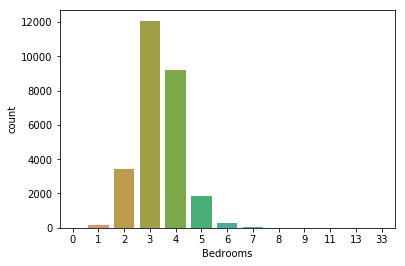

In [7]:
## Complete Seaborn.barplot ()
sns.barplot(x="Bedrooms", y="count",  data=freq_count);
plt.show()

## Create a BoxPlot on sale prices 
Sale prices per property type  (Single Family, Townhouse)

In [8]:
price_by_property_type = house_prices.select('PropertyType', 'SalePrice').toPandas()
price_by_property_type



,PropertyType,SalePrice
0,Multiplex,280000
1,Single Family,1000000
2,Single Family,745000
3,Single Family,425000
4,Single Family,240000
5,Townhouse,349900
6,Single Family,327500
7,Single Family,347000
8,Single Family,220400
9,Multiplex,437500


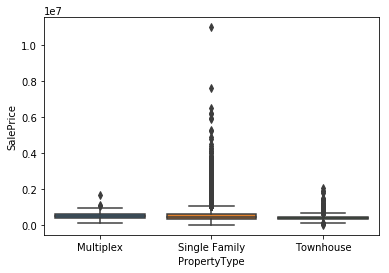

In [9]:
sns.boxplot(x="PropertyType", y="SalePrice",  data=price_by_property_type);
plt.show()

## Bonus Lab : Improving our plot
Our plot data is pretty 'squished'  Let's see if we can improve it.  
Some of the outliers (like the 33 bedroom house is messing up the display).  
Let's remove the outliers.

In [10]:
## We are going to remove 10% off the data from the bottom and top

## first calculate 10%  and 90% prices
ten_ninety = house_prices.stat.approxQuantile("SalePrice", [0.1, 0.9], 0.0)

## extract 10% and 90% into variables
ten_percent_price = int(ten_ninety[0])
ninety_percent_price = int(ten_ninety[1])
print("10% price=", ten_percent_price,  ", 90% price=", ninety_percent_price)

10% price= 260000 , 90% price= 820000


In [11]:
## filter out below 10% and above 90%
print("total sales ", house_prices.count())
above_ten = house_prices.filter(house_prices["SalePrice"] >= ten_percent_price)
print("above 10% " , above_ten.count())
below_ninety  = house_prices.filter(house_prices["SalePrice"] <= ninety_percent_price)
print("below 90% ", below_ninety.count())

above_ten_below_ninety = house_prices.filter(\
                                            (house_prices["SalePrice"] >= ten_percent_price)\
                                             &\
                                             (house_prices["SalePrice"] <= ninety_percent_price))
print("between 10% and 90% ", above_ten_below_ninety.count())

total sales  27063
above 10%  24411
below 90%  24368
between 10% and 90%  21716


In [12]:
## Plot again!

mid_tier_sales = above_ten_below_ninety.select('PropertyType', 'SalePrice').toPandas()
mid_tier_sales

,PropertyType,SalePrice
0,Multiplex,280000
1,Single Family,745000
2,Single Family,425000
3,Townhouse,349900
4,Single Family,327500
5,Single Family,347000
6,Multiplex,437500
7,Single Family,300000
8,Single Family,292000
9,Single Family,299800


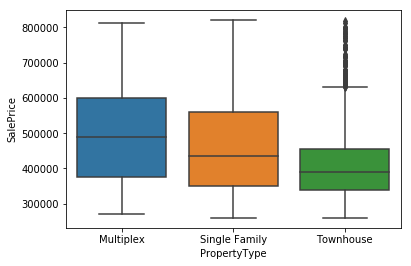

In [13]:
sns.boxplot(x="PropertyType", y="SalePrice",  data=mid_tier_sales);

## Any other plots?
Look at [MatplotLib Examples](https://matplotlib.org/gallery.html).
If any of them inspire you try to create a graph like that!
And do show it off to the class  :-)